# 1. Import libraries to be used in this notebook

In [1]:
import numpy as np # for array manipulation and basic scientific calculation
import xarray as xr # To read NetCDF files
import matplotlib.pyplot as plt # Core library for plotting
from functions.SE_analysis import get_site_index # To get 

# 2. Read files

## 2.1. Model output

In [2]:
Filebase_nanjing = '/glade/campaign/acom/acom-weather/emmons/tutorial_nanjing/f.e3beta01.FCnudged.Nanjing_ne30x8.02/atm/hist/f.e3beta01.FCnudged.Nanjing_ne30x8.02.cam.h1a.2024-03-DD-00000.nc'
# Change "DD" to 01~31 for a month calculation
Files_nanjing = [] # empty list for a start
# file list with 31 files
for dd in np.arange(31):
    Files_nanjing.append( Filebase_nanjing.replace('DD',str(dd+1).zfill(2)) )
# read 31 files at once using "mf"dataset
ds_nanjing = xr.open_mfdataset( Files_nanjing ) 


## 2.2. SCRIP file
### SCRIP file has grid information that is needed to find index of city
### Don't have to read, just locate where the files are

In [3]:
SCRIP_nanjing = '/glade/work/emmons/tutorial_Nanjing/ne0np4.Nanjing.ne30x8/grids/Nanjing_ne30x8_np4_SCRIP.nc'

# 3. Find indices of cities on spectral element grid

In [54]:
# Use python dictionary for lon/lat locations of cities
City_lonlat = {}

City_lonlat['Beijing'] = [ 116.4074, 39.9042  ] 
City_lonlat['Nanjing'] = [ 118.7969, 32.0603 ] 
City_lonlat['Guangzhou'] = [113.2644, 23.1291 ] 

# Get index of each city location
Index_lonlat = {}
for city in City_lonlat.keys():
    Index_lonlat[city] = get_site_index( City_lonlat[city][0], City_lonlat[city][1], 
                                         scrip_file=SCRIP_nanjing )

In [55]:
Index_lonlat

{'Beijing': 57606, 'Nanjing': 59483, 'Guangzhou': 54791}

# 4. Get timeseries

In [56]:
TS = {}
for city in City_lonlat.keys():
    TS[city] = ds_nanjing['O3'][1:31,-1,:].values[:,Index_lonlat[city]] # dimension -> time,ncol

# 5. Draw a simple plot

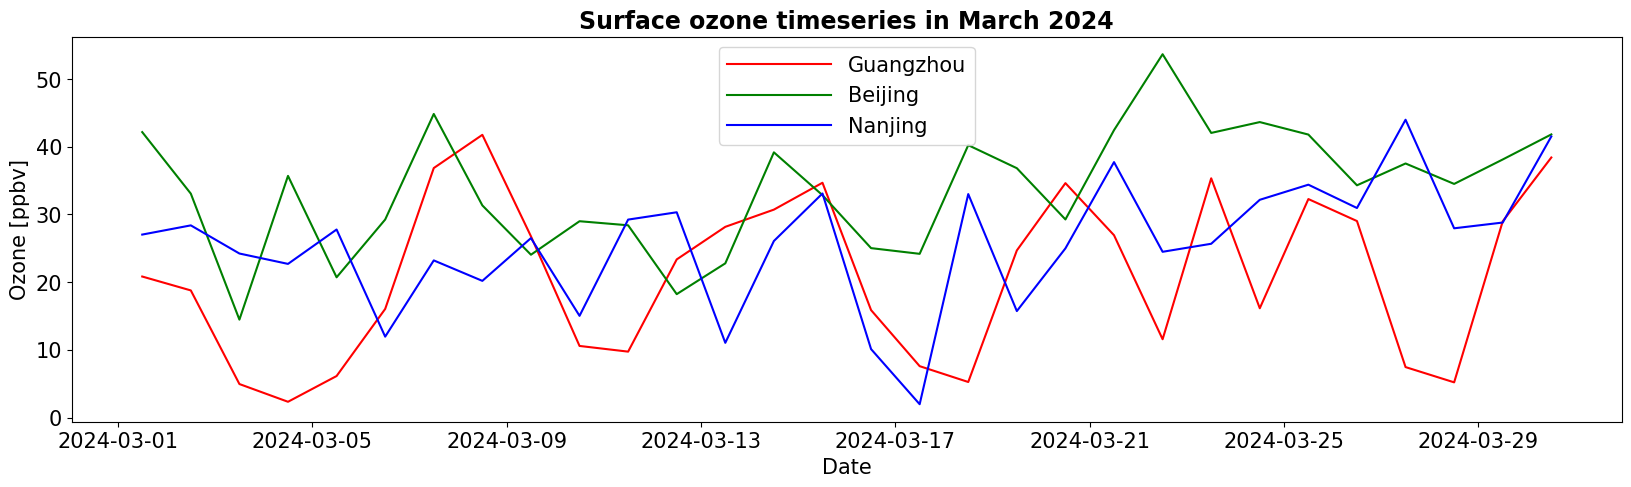

In [57]:
fig = plt.figure( figsize=(20,5) )
ax = fig.add_subplot(1,1,1)

# Plot O3 timeseries
ax.plot( ds_nanjing.time.values[1:31], TS['Guangzhou']*1e9, 'r-', label='Guangzhou' )
ax.plot( ds_nanjing.time.values[1:31], TS['Beijing']*1e9, 'g-', label='Beijing' )
ax.plot( ds_nanjing.time.values[1:31], TS['Nanjing']*1e9, 'b-', label='Nanjing' )


# === Polish the plot === 
# Font size
xticklabels = plt.setp( ax.get_xticklabels(), fontsize=15 )
yticklabels = plt.setp( ax.get_yticklabels(), fontsize=15 )
# Add x & y axis titles
xlabel = ax.set_xlabel( 'Date', fontsize=15 )
ylabel = ax.set_ylabel( 'Ozone [ppbv]', fontsize=15 )
# Add plot title
title = ax.set_title( 'Surface ozone timeseries in March 2024', fontsize=17, weight='semibold' )
# Add legend
ax.legend( loc=0, handlelength=5, fontsize=15 )
